In [1]:
import torch
import glob
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image
from cifar_models.models_vgg import *
from utils import *
from visualisation.core.utils import device 
from visualisation.core import *

torch.Size([2, 10])


In [2]:
def free(modules):
    for m in modules:
        del m
    torch.cuda.empty_cache()

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

cifar_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified


In [3]:
klasy = dict
klasy = list(classes)
class_dict = {index:classes[index] for index in range(len(classes))}

plt.rcParams["figure.figsize"]= 16,8
images, x = [], 0

while(class_dict):
    index = cifar_dataset[x][1]
    if index in class_dict:
        images.append(cifar_dataset[x][0])
        del class_dict[index]
    x += 1
    
test_list = []
for x in range(30):
    test_list.append(cifar_dataset[x][0])
# subplot(images, title='example inputs', nrows=2, ncols=5)

In [4]:
import torch.backends.cudnn as cudnn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

net = ResNet18()
net = net.to(device)
net.eval()

if device == 'cuda':
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True
    
checkpoint = torch.load('./checkpoints/resnet_ckpt.pth')
net.load_state_dict(checkpoint['net'])

<All keys matched successfully>

In [5]:
inputs  = [transform(x).unsqueeze(0) for x in images]
inputs = [i.to(device) for i in inputs]

test_inputs  = [transform(x).unsqueeze(0) for x in test_list]
test_inputs = [i.to(device) for i in test_inputs]

In [6]:
model_traced = module2traced(net, inputs[0])

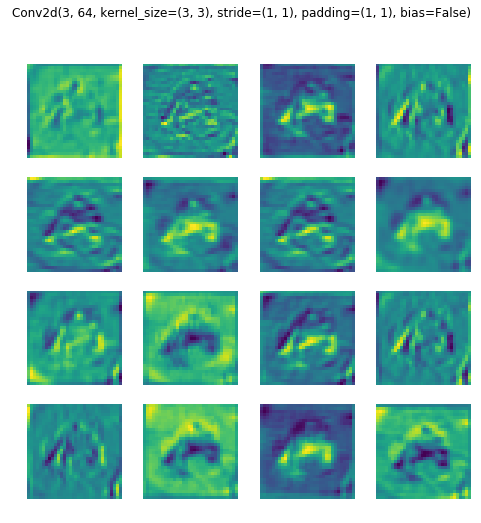

In [7]:
vis = Weights(net, device)
first_layer = model_traced[0]
plt.rcParams["figure.figsize"]= 8,8
run_vis_plot(vis, inputs[0], first_layer, ncols=4, nrows=4)

In [8]:
net.eval()
pred = net(inputs[0])
_, id = torch.max(pred, 1)
print(id.item())

print('predicted class: {}'.format(classes[id.item()]))

6
predicted class: frog


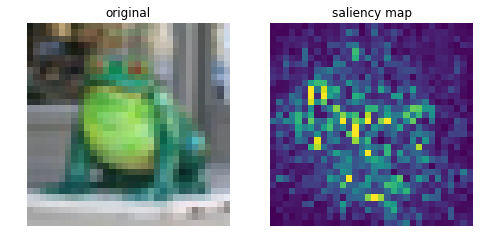

In [9]:
vis = SaliencyMap(net, device)
net = net.to(device)
x=19
out, info = vis(test_inputs[x], 
          first_layer, guide=True)
test_list[x] = transforms.ToTensor()(test_list[x])
subplot([test_list[x], out], 
        rows_titles=['original', 'saliency map'],
        parse=tensor2img, 
        nrows=1, ncols=2)